In [2]:
from impedance import preprocessing

# Load data from the example EIS data
frequencies, Z = preprocessing.readCSV('./exampleData.csv')

# keep only the impedance data in the first quandrant
frequencies, Z = preprocessing.ignoreBelowX(frequencies, Z)

In [3]:
from impedance.models.circuits import CustomCircuit

circuit = 'R0-p(R1,C1)-p(R2-Wo1,C2)'
initial_guess = [.01, .01, 100, .01, .05, 100, 1]

circuit = CustomCircuit(circuit, initial_guess=initial_guess)

In [4]:
circuit.fit(frequencies, Z)

C:\Users\gagni\AppData\Roaming\Python\Python312\site-packages\impedance\models\circuits\elements.py:170: RuntimeWarning: overflow encountered in tanh
  Z = Z0 / (np.sqrt(1j * omega * tau) * np.tanh(np.sqrt(1j * omega * tau)))


In [5]:
Z_fit = circuit.predict(frequencies)

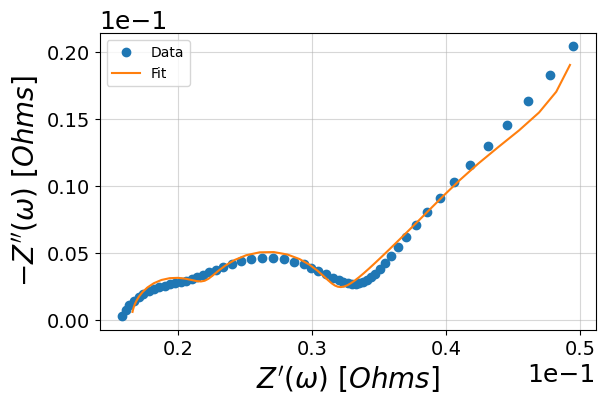

In [6]:
import matplotlib.pyplot as plt
from impedance.visualization import plot_nyquist

fig, ax = plt.subplots()
plot_nyquist(Z, fmt='o', scale=10, ax=ax)
plot_nyquist(Z_fit, fmt='-', scale=10, ax=ax)

plt.legend(['Data', 'Fit'])
plt.show()

In [7]:
from impedance.models.circuits import Randles, CustomCircuit

In [8]:
randles = Randles(initial_guess=[.01, .005, .001, 200, .1])
randlesCPE = Randles(initial_guess=[.01, .005, .001, 200, .1, .9], CPE=True)

In [9]:
customCircuit = CustomCircuit(initial_guess=[.01, .005, .1, .005, .1, .001, 200],
                              circuit='R_0-p(R_1,C_1)-p(R_2,C_2)-Wo_1')

In [10]:
customConstantCircuit = CustomCircuit(initial_guess=[None, .005, .1, .005, .1, .001, None],
                                      constants={'R_0': 0.02, 'Wo_1_1': 200},
                                      circuit='R_0-p(R_1,C_1)-p(R_2,C_2)-Wo_1')

In [11]:
print(customConstantCircuit)


Circuit string: R_0-p(R_1,C_1)-p(R_2,C_2)-Wo_1
Fit: False

Constants:
    R_0 = 2.00e-02 [Ohm]
  Wo_1_1 = 2.00e+02 [sec]

Initial guesses:
    R_1 = 5.00e-03 [Ohm]
    C_1 = 1.00e-01 [F]
    R_2 = 5.00e-03 [Ohm]
    C_2 = 1.00e-01 [F]
  Wo_1_0 = 1.00e-03 [Ohm]



In [13]:
from impedance import preprocessing

frequencies, Z = preprocessing.readCSV('exampleData.csv')

# keep only the impedance data in the first quandrant
frequencies, Z = preprocessing.ignoreBelowX(frequencies, Z)

In [14]:
randles.fit(frequencies, Z)
randlesCPE.fit(frequencies, Z)
customCircuit.fit(frequencies, Z)
customConstantCircuit.fit(frequencies, Z)

print(customConstantCircuit)


Circuit string: R_0-p(R_1,C_1)-p(R_2,C_2)-Wo_1
Fit: True

Constants:
    R_0 = 2.00e-02 [Ohm]
  Wo_1_1 = 2.00e+02 [sec]

Initial guesses:
    R_1 = 5.00e-03 [Ohm]
    C_1 = 1.00e-01 [F]
    R_2 = 5.00e-03 [Ohm]
    C_2 = 1.00e-01 [F]
  Wo_1_0 = 1.00e-03 [Ohm]

Fit parameters:
    R_1 = 6.79e-03  (+/- 1.08e-03) [Ohm]
    C_1 = 5.62e+00  (+/- 1.96e+00) [F]
    R_2 = 3.91e-03  (+/- 1.09e-03) [Ohm]
    C_2 = 1.36e+00  (+/- 2.61e-01) [F]
  Wo_1_0 = 5.88e-02  (+/- 1.25e-03) [Ohm]



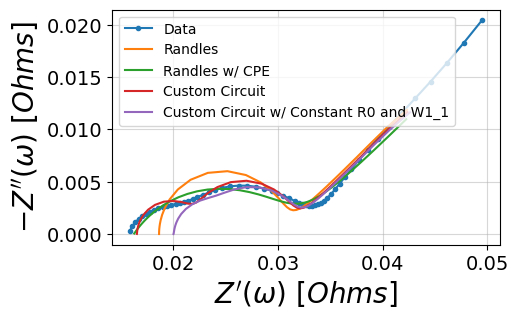

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from impedance.visualization import plot_nyquist

f_pred = np.logspace(5,-2)

randles_fit = randles.predict(f_pred)
randlesCPE_fit = randlesCPE.predict(f_pred)
customCircuit_fit = customCircuit.predict(f_pred)
customConstantCircuit_fit = customConstantCircuit.predict(f_pred)

fig, ax = plt.subplots(figsize=(5,5))

plot_nyquist(Z, ax=ax)
plot_nyquist(randles_fit, fmt='-', ax=ax)
plot_nyquist(randlesCPE_fit, fmt='-', ax=ax)
plot_nyquist(customCircuit_fit, fmt='-', ax=ax)
plot_nyquist(customConstantCircuit_fit, fmt='-', ax=ax)

ax.legend(['Data', 'Randles', 'Randles w/ CPE', 'Custom Circuit', 'Custom Circuit w/ Constant R0 and W1_1'])
plt.show()

C:\Users\gagni\AppData\Roaming\Python\Python312\site-packages\impedance\visualization.py:39: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string ".-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(np.real(Z), -np.imag(Z), fmt, **kwargs)
C:\Users\gagni\AppData\Roaming\Python\Python312\site-packages\impedance\visualization.py:39: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".-" (-> marker='.'). The keyword argument will take precedence.
  ax.plot(np.real(Z), -np.imag(Z), fmt, **kwargs)


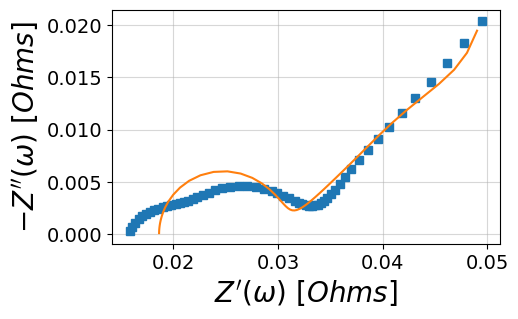

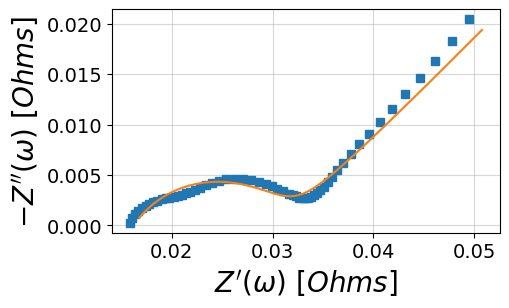

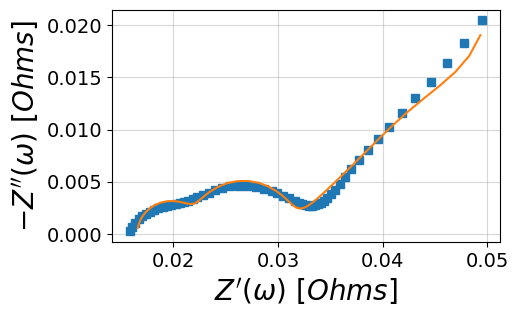

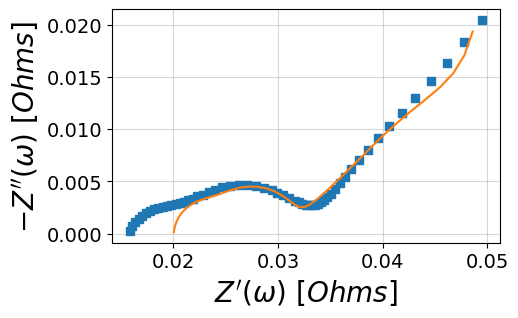

In [16]:
randles.plot(f_data=frequencies, Z_data=Z, kind='nyquist')
randlesCPE.plot(f_data=frequencies, Z_data=Z, kind='nyquist')
customCircuit.plot(f_data=frequencies, Z_data=Z, kind='nyquist')
customConstantCircuit.plot(f_data=frequencies, Z_data=Z, kind='nyquist')

plt.show()

In [17]:
from impedance.models.circuits.elements import element

@element(1, units=["hands"])
def H(p, f):
    """ A 'pointless' circuit element

    Parameters
    ----------
    p : list of numeric
        a list of parameters, e.g. p[0] is used as the radius below
    f : list of numeric
        a list of frequencies in Hz

    Returns
    -------
    Z : array of complex
        custom elements should return an array of complex impedance values
    """
    omega = 2*np.pi*np.array(f)
    return p[0]*np.cos(omega) + p[0]*1j*np.sin(omega)

C:\Users\gagni\AppData\Roaming\Python\Python312\site-packages\impedance\models\circuits\circuits.py:145: UserWarning: Simulating circuit based on initial parameters
  warnings.warn("Simulating circuit based on initial parameters")


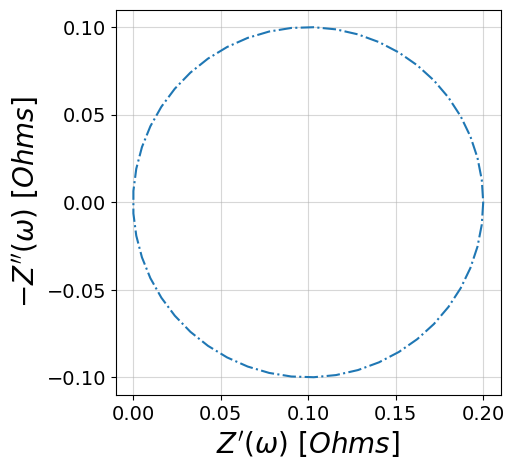

In [18]:
customElementCircuit = CustomCircuit(initial_guess=[0.1, 0.1], circuit='R_0-H_1')

f_pred = np.linspace(0, 1)

customElementCircuit_fit = customElementCircuit.predict(f_pred)

fig, ax = plt.subplots(figsize=(5,5))
plot_nyquist(customElementCircuit_fit, fmt='-.', ax=ax)
plt.show()